In [ ]:
"""FEATURE IMPORTANCE ANALYSIS USING RANDOM FOREST"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor


#loading dataset
file_path = r'C:\Users\pc\OneDrive\Documents\anxiety_attack_dataset.csv'

df= pd.read_csv(file_path)

#dropping ID columns since it is not useful for prediction
df= df.drop(columns= ['ID','Sweating Level (1-5)'])

#encoding categorical variables
categorical_cols= ['Gender','Occupation','Smoking','Family History of Anxiety', 'Dizziness','Medication','Recent Major Life Event']
label_encoders= {}
for col in categorical_cols:
    if col in df.columns:
        le=LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col]=le

for col in categorical_cols:
    df[col]=label_encoders[col].fit_transform(df[col])
    
#Separating features and target variable
target_col= 'Severity of Anxiety Attack (1-10)'
if target_col not in df.columns:
    raise ValueError(f"Target column'{target_col}' not found in dataset.")


X=df.drop(columns=['Severity of Anxiety Attack (1-10)'])
y=df['Severity of Anxiety Attack (1-10)']

#Spliting data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=42)

#Standardizing numerical features
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

#Converting back to DF for readability
X_train= pd.DataFrame(X_train_scaled, columns=X.columns)
X_test= pd.DataFrame(X_test_scaled, columns=X.columns)

#Train a Random Forest model
rf_model= RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)




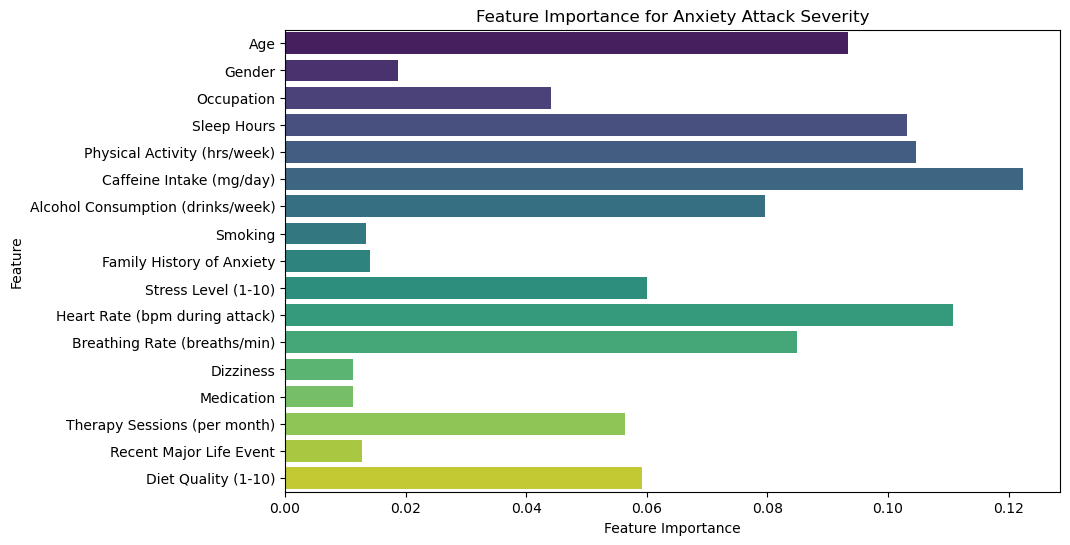

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=rf_model.feature_importances_,y=X.columns,palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Anxiety Attack Severity")
plt.show()